<a href="https://colab.research.google.com/github/SerHol17/ClaseMaestria/blob/main/Pendulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Liberias e hiperparametros

In [12]:
#Librerias
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import solve_ivp

In [16]:
#Hiperparametros
l = 0.13  # Longitud (mts)
g = 9.81  # Gravedad (mts/s2)


#Funciones para hallar las ecuaciones diferenciales y metodos numericos.

In [4]:

# Funciones
def mas(t, theta_m, omega_n, phi):
    t = t / 1000  # Convertir t de milisegundos a segundos
    omega_n = np.degrees(omega_n)
    return theta_m * np.sin(np.radians(omega_n * t + phi))

def pendulum(t, y):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = -(g / l) * np.sin(theta)
    return [dtheta_dt, domega_dt]

def theta_analytical(t):
    return theta_0 * np.cos(np.sqrt(g / l) * t)

def theta_analytical_deg(t):
    return np.rad2deg(theta_0) * np.cos(np.sqrt(g / l) * t)

#Angulo pequeño (8 grados)

##Carga de datos

In [5]:
df=pd.read_excel("/content/Data_T010.xlsx")

In [47]:
df=pd.DataFrame(df)
times = df["Tiempo (ms)"].to_numpy()
angles = df["Ãngulo 1"].to_numpy()
theta_0_deg = 8 # ángulo inicial en grados es un hiperparametro pero no se puede generalizar porque es el que se varia según el experimento

##Metodo Experimental

Frecuencia angular natural ajustada: 7.53976752729414 grados/s


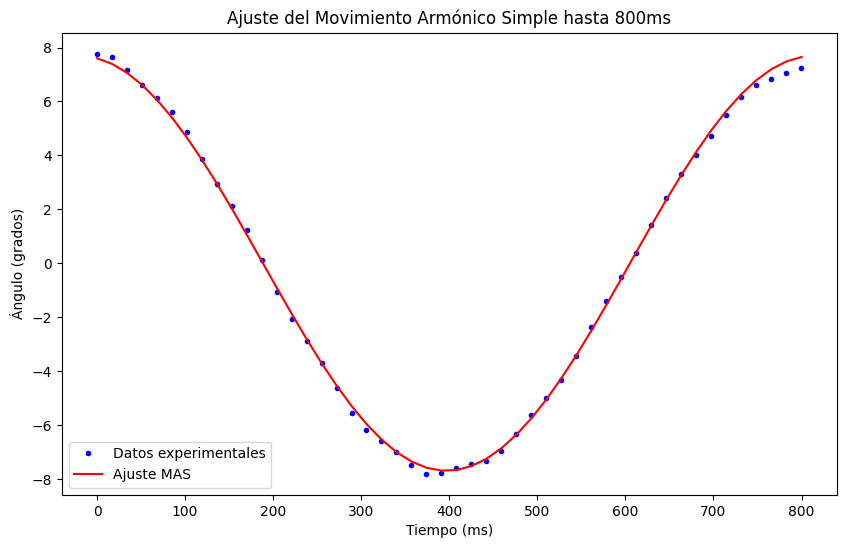

In [48]:
# Definir t_eval para 47 puntos en el rango de 0 a 800 ms
t_eval = np.linspace(0, 800, len(df["Tiempo (ms)"]))

# Ajustar MAS utilizando los puntos definidos en t_eval
popt, pcov = curve_fit(mas, t_eval, np.interp(t_eval, times, angles), p0=[max(angles), 2 * np.pi / 0.8, 0])
theta_m_opt, omega_n_opt, phi_opt = popt
print(f"Frecuencia angular natural ajustada: {omega_n_opt} grados/s")

# Gráfica de ajuste MAS
plt.figure(figsize=(10, 6))
plt.plot(times, angles, 'b.', label='Datos experimentales')
plt.plot(t_eval, mas(t_eval, *popt), 'r-', label='Ajuste MAS')
plt.title('Ajuste del Movimiento Armónico Simple hasta 800ms')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Ángulo (grados)')
plt.legend()
plt.show()

##Metodo numerico y analitico

In [49]:
sol = solve_ivp(pendulum, [t_eval[0] / 1000, t_eval[-1] / 1000], [theta_0,0], t_eval=t_eval / 1000)
sol_y_deg = np.rad2deg(sol.y[0])

##Grafica

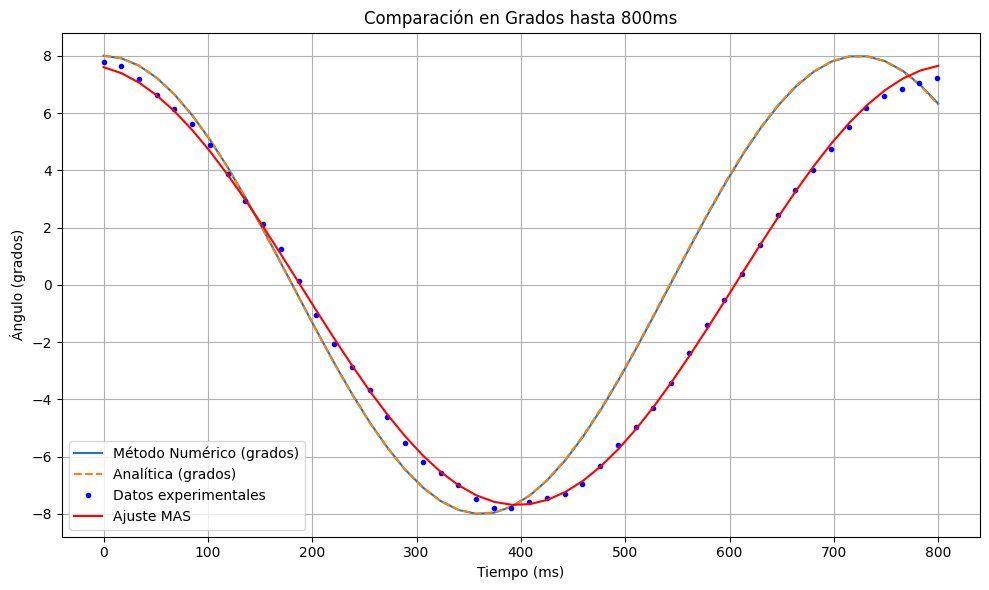

In [50]:
# Gráfica de comparación
plt.figure(figsize=(10, 6))
plt.plot(sol.t * 1000, sol_y_deg, label='Método Numérico (grados)')
plt.plot(t_eval, theta_analytical_deg(t_eval / 1000), '--', label='Analítica (grados)')
plt.plot(times, angles, 'b.', label='Datos experimentales')
plt.plot(t_eval, mas(t_eval, *popt), 'r-', label='Ajuste MAS')
plt.title('Comparación en Grados hasta 800ms')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Ángulo (grados)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#Angulo Grande (40 grados)

##Carga de datos

In [54]:
df=pd.read_excel("/content/Data_T040.xlsx")

In [59]:
df=pd.DataFrame(df)
times = df["Tiempo (ms)"].to_numpy()
angles = df["Angulo 1"].to_numpy()
theta_0_deg = 40
theta_0 = np.deg2rad(theta_0_deg)

##Metodo Experimental

Frecuencia angular natural ajustada: 7.743498887042096 grados/s


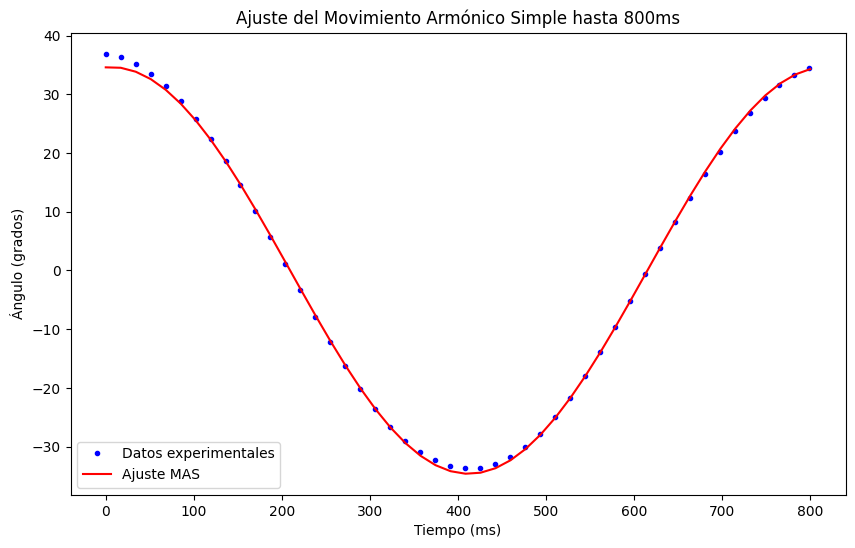

In [60]:
# Definir t_eval para 47 puntos en el rango de 0 a 800 ms
t_eval = np.linspace(0, 800, len(df["Tiempo (ms)"]))

# Ajustar MAS utilizando los puntos definidos en t_eval
popt, pcov = curve_fit(mas, t_eval, np.interp(t_eval, times, angles), p0=[max(angles), 2 * np.pi / 0.8, 0])
theta_m_opt, omega_n_opt, phi_opt = popt
print(f"Frecuencia angular natural ajustada: {omega_n_opt} grados/s")

# Gráfica de ajuste MAS
plt.figure(figsize=(10, 6))
plt.plot(times, angles, 'b.', label='Datos experimentales')
plt.plot(t_eval, mas(t_eval, *popt), 'r-', label='Ajuste MAS')
plt.title('Ajuste del Movimiento Armónico Simple hasta 800ms')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Ángulo (grados)')
plt.legend()
plt.show()

##Metodo numerico y analitico

In [61]:
sol = solve_ivp(pendulum, [t_eval[0] / 1000, t_eval[-1] / 1000], [theta_0,0], t_eval=t_eval / 1000)
sol_y_deg = np.rad2deg(sol.y[0])

##Grafica

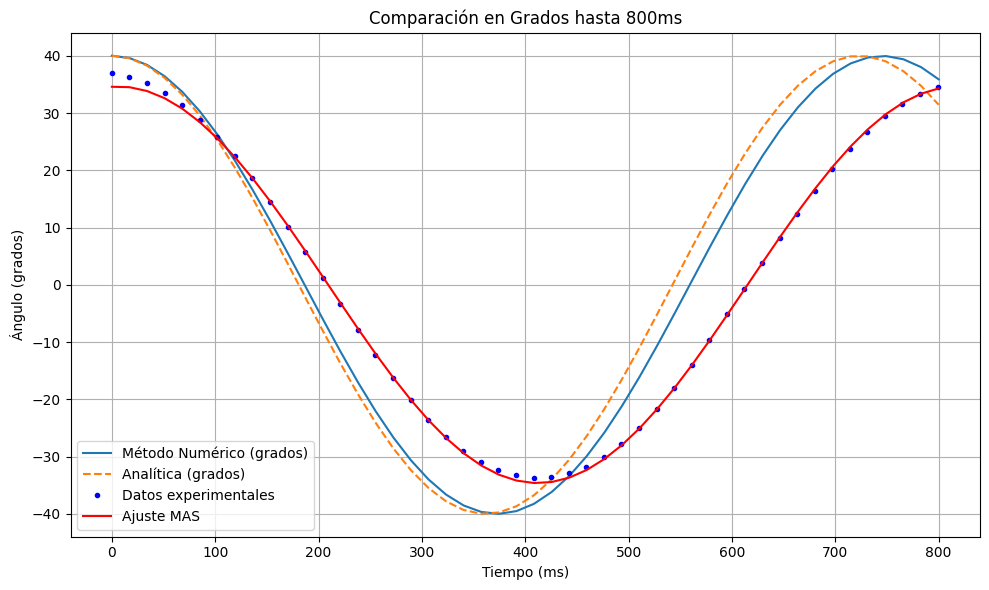

In [62]:
# Gráfica de comparación
plt.figure(figsize=(10, 6))
plt.plot(sol.t * 1000, sol_y_deg, label='Método Numérico (grados)')
plt.plot(t_eval, theta_analytical_deg(t_eval / 1000), '--', label='Analítica (grados)')
plt.plot(times, angles, 'b.', label='Datos experimentales')
plt.plot(t_eval, mas(t_eval, *popt), 'r-', label='Ajuste MAS')
plt.title('Comparación en Grados hasta 800ms')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Ángulo (grados)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
